In [1]:
from TestCases.straddle_plays import non_earnings_combined, earnings_combined
from MachineLearning.conversion import clean_df, filter_stock_basis
from Jupyter.jupyter_app import visualize_and_correlate

# Only taking data where underlying moves less than half a percent
x = filter_stock_basis(earnings_combined, movement_maximum=0.1)

In [2]:
x

,entry_time,exit_time,strategy_profit_percent,stock_linear_correlated_measure
0,43140.0,55800.0,0.011343,0.011021
1,43140.0,55860.0,0.011343,0.011074
2,43140.0,55920.0,0.006567,0.010304
3,43140.0,55980.0,0.003582,0.010092
4,43140.0,56040.0,0.003582,0.010304
...,...,...,...,...
6600,49500.0,57300.0,-0.006550,0.000499
6601,49500.0,57360.0,0.013100,0.000026
6602,49500.0,57420.0,-0.006065,0.001462
6603,49500.0,57480.0,-0.008734,0.000412


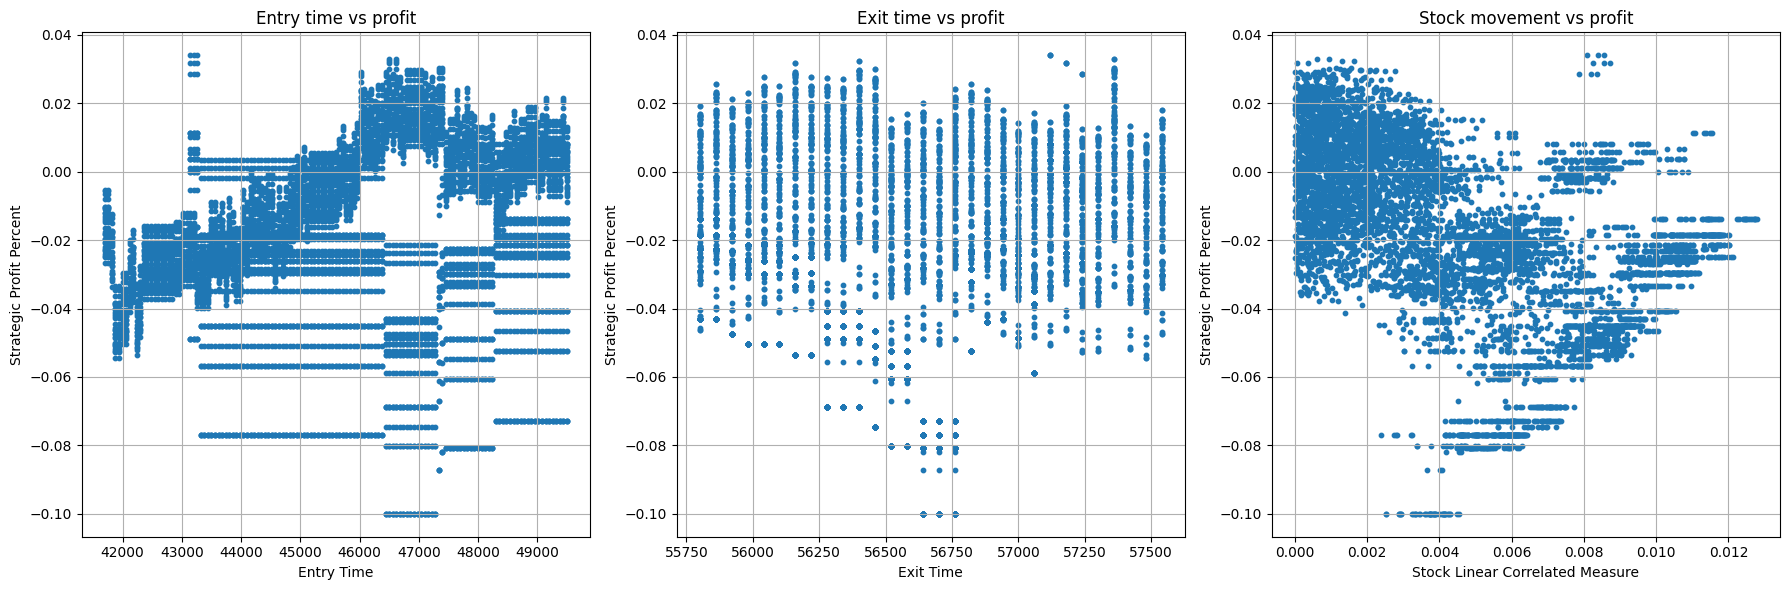

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# First scatter plot: Delta Volume Percent vs Strategic Profit Percent
x1 = x['entry_time']
y1 = x['strategy_profit_percent']
axs[0].scatter(x1, y1, s=10)
axs[0].set_xlabel('Entry Time')
axs[0].set_ylabel('Strategic Profit Percent')
axs[0].set_title('Entry time vs profit')
axs[0].grid(True)

# Second scatter plot: Delta Volume Percent vs Strategic Profit Percent
x2 = x['exit_time']
y2 = x['strategy_profit_percent']
axs[1].scatter(x2, y2, s=10)
axs[1].set_xlabel('Exit Time')
axs[1].set_ylabel('Strategic Profit Percent')
axs[1].set_title('Exit time vs profit')
axs[1].grid(True)

# Third scatter plot: Stock movement vs Strategic Profit Percent
x3 = x['stock_linear_correlated_measure']
y3 = x['strategy_profit_percent']
axs[2].scatter(x3, y3, s=10)
axs[2].set_xlabel('Stock Linear Correlated Measure')
axs[2].set_ylabel('Strategic Profit Percent')
axs[2].set_title('Stock movement vs profit')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [4]:
x.corr().iloc[2]

entry_time                         0.228658
exit_time                          0.039574
strategy_profit_percent            1.000000
stock_linear_correlated_measure   -0.458963
Name: strategy_profit_percent, dtype: float64